In [64]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [65]:
img_width = 150
img_height = 150

train_data_dir = 'image_data/training'
validation_data_dir = 'image_data/validation'
train_samples = 200
validation_samples = 200
epochs = 7
batch_size = 20
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [66]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [67]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

In [68]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [69]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [70]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [71]:
print(train_generator.class_indices)

{'Jeans': 0, 'Trowsers': 1}


In [72]:
imgs, labels = next(train_generator)

In [73]:
from skimage import io
def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
1.0


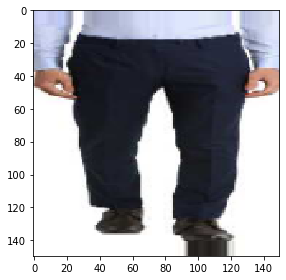

0.0


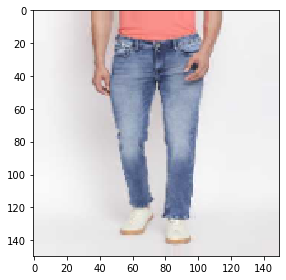

1.0


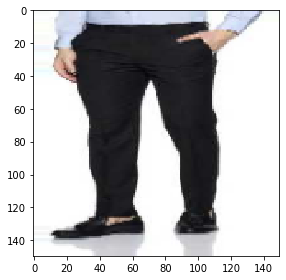

0.0


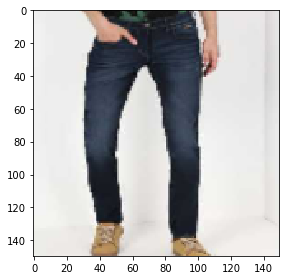

0.0


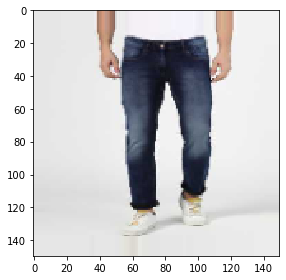

1.0


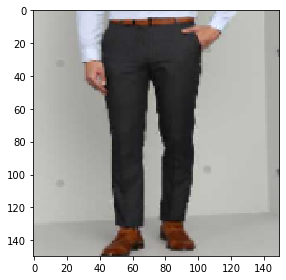

1.0


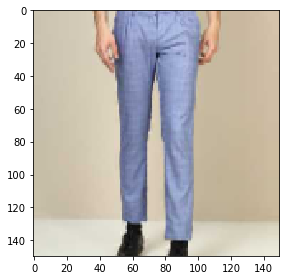

0.0


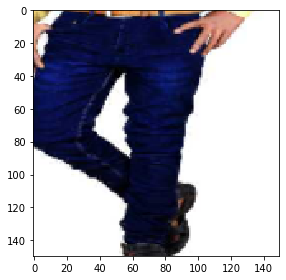

0.0


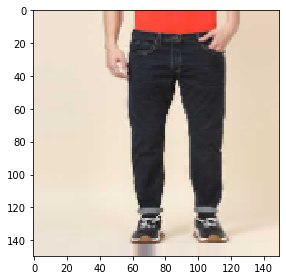

1.0


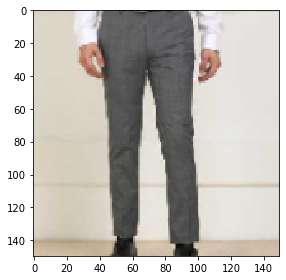

1.0


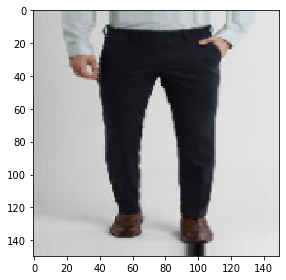

0.0


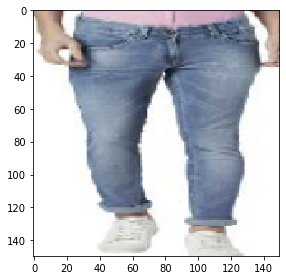

1.0


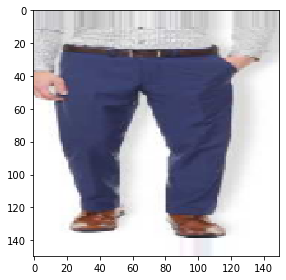

0.0


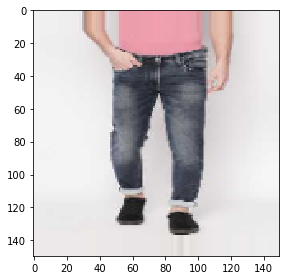

1.0


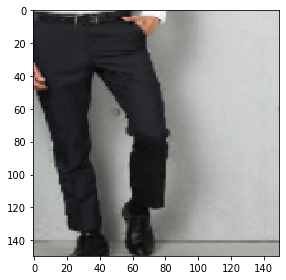

1.0


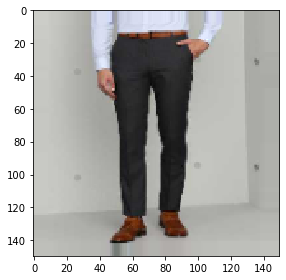

0.0


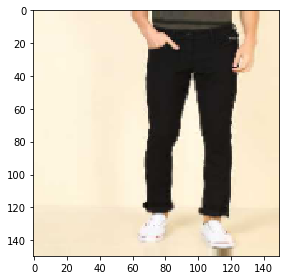

0.0


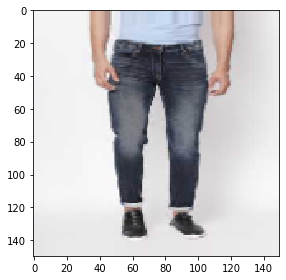

0.0


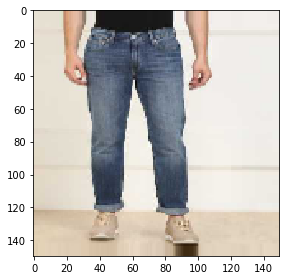

0.0


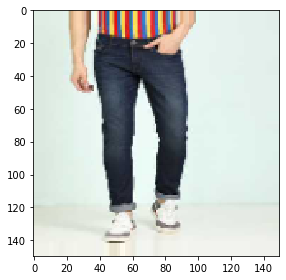

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()
print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [75]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [76]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/7
10/10 [==============================] - 2s 221ms/step - loss: 0.7069 - accuracy: 0.5050 - val_loss: 0.6863 - val_accuracy: 0.5050
Epoch 2/7
10/10 [==============================] - 2s 171ms/step - loss: 0.6933 - accuracy: 0.4950 - val_loss: 0.6743 - val_accuracy: 0.5950
Epoch 3/7
10/10 [==============================] - 2s 196ms/step - loss: 0.6760 - accuracy: 0.5500 - val_loss: 0.6754 - val_accuracy: 0.7450
Epoch 4/7
10/10 [==============================] - 2s 170ms/step - loss: 0.6723 - accuracy: 0.6100 - val_loss: 0.6223 - val_accuracy: 0.7200
Epoch 5/7
10/10 [==============================] - 2s 175ms/step - loss: 0.6643 - accuracy: 0.6300 - val_loss: 0.6531 - val_accuracy: 0.6900
Epoch 6/7
10/10 [==============================] - 2s 173ms/step - loss: 0.6508 - accuracy: 0.6750 - val_loss: 0.6330 - val_accuracy: 0.7450
Epoch 7/7
10/10 [==============================] - 2s 174ms/step - loss: 0.6298 - accuracy: 0.7050 - val_loss: 0.6146 - val_accuracy: 0.7850


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


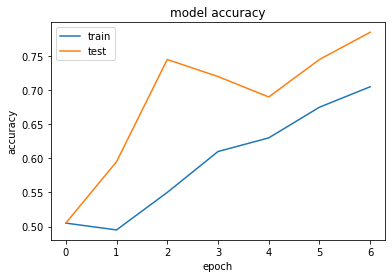

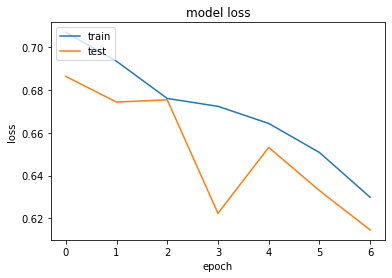

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
predict_dir_path='image_data/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['jeans.100.jpeg', 'jeans.25.jpeg', 'jeans.26.jpeg', 'jeans.27.jpeg', 'jeans.28.jpeg', 'jeans.29.jpeg', 'jeans.91.jpeg', 'jeans.92.jpeg', 'jeans.93.jpeg', 'jeans.99.jpeg', 'trowsers.10.jpeg', 'trowsers.11.jpeg', 'trowsers.12.jpeg', 'trowsers.3.jpeg', 'trowsers.59.jpeg', 'trowsers.60.jpeg', 'trowsers.61.jpeg', 'trowsers.62.jpeg', 'trowsers.63.jpeg', 'trowsers.9.jpeg']


In [79]:
from keras.preprocessing import image
trowsers_counter = 0 
jeans_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'Jeans')
        jeans_counter += 1
    else:
        print(file + ": " + 'Trowsers')
        trowsers_counter += 1
print("Total Trowsers :", trowsers_counter)
print("Total Jeans :", jeans_counter)

jeans.100.jpeg: Jeans
jeans.25.jpeg: Jeans
jeans.26.jpeg: Jeans
jeans.27.jpeg: Trowsers
jeans.28.jpeg: Jeans
jeans.29.jpeg: Jeans
jeans.91.jpeg: Jeans
jeans.92.jpeg: Jeans
jeans.93.jpeg: Jeans
jeans.99.jpeg: Jeans
trowsers.10.jpeg: Trowsers
trowsers.11.jpeg: Trowsers
trowsers.12.jpeg: Trowsers
trowsers.3.jpeg: Trowsers
trowsers.59.jpeg: Trowsers
trowsers.60.jpeg: Trowsers
trowsers.61.jpeg: Jeans
trowsers.62.jpeg: Trowsers
trowsers.63.jpeg: Trowsers
trowsers.9.jpeg: Jeans
Total Trowsers : 9
Total Jeans : 11
